In [1]:
# Importing the required libraries
import json
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading and preprocessing data
data = []
with open("political_orientation_data.json", "r") as f:
    for line in f:
        data.append(json.loads(line))

In [4]:
texts = [item["text"] for item in data]
labels = [item["label"] for item in data]

In [5]:
# TFIDF Vectorizer to transform the data
vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(texts).toarray()

In [6]:
# Encoding the labels
encoder = LabelEncoder()
y = encoder.fit_transform(labels)

In [7]:
# Splitting the dataset into the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
# Creating the model and defining the architecture
model = Sequential([
    Dense(5000, activation='relu', input_shape=(10000,)),
    Dense(2500, activation='relu'),
    Dense(1, activation='sigmoid', name='output_layer')
])
# model = Sequential([
#     Dense(5000, activation='relu', input_shape=(10000,)),
#     Dense(2500, activation='relu', name='hidden_layer'),
#     Dense(1, activation='sigmoid', name='output_layer')
# ])

In [9]:
# Compiling the model
model.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [10]:
# Training the model and saving the best checkpoint
checkpoint = ModelCheckpoint(
    "best_model.h5",
    monitor="val_accuracy",
    mode="max",
    save_best_only=True,
    verbose=1
)

In [11]:
# Running the model for 30 epochs and tracking tracking the accuracy
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=8,
    callbacks=[checkpoint]
)

Epoch 1/30
465/469 [============================>.] - ETA: 0s - loss: 0.6592 - accuracy: 0.6462
Epoch 1: val_accuracy improved from -inf to 0.65120, saving model to best_model.h5
469/469 [==============================] - 14s 21ms/step - loss: 0.6589 - accuracy: 0.6467 - val_loss: 0.6467 - val_accuracy: 0.6512
Epoch 2/30
469/469 [==============================] - ETA: 0s - loss: 0.6489 - accuracy: 0.6464
Epoch 2: val_accuracy did not improve from 0.65120
469/469 [==============================] - 6s 14ms/step - loss: 0.6489 - accuracy: 0.6464 - val_loss: 0.6459 - val_accuracy: 0.6512
Epoch 3/30
469/469 [==============================] - ETA: 0s - loss: 0.6480 - accuracy: 0.6464
Epoch 3: val_accuracy did not improve from 0.65120
469/469 [==============================] - 9s 19ms/step - loss: 0.6480 - accuracy: 0.6464 - val_loss: 0.6455 - val_accuracy: 0.6512
Epoch 4/30
467/469 [============================>.] - ETA: 0s - loss: 0.6469 - accuracy: 0.6467
Epoch 4: val_accuracy did not impr

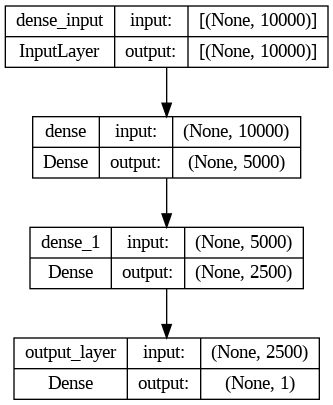

In [12]:
# Visualization of the model architecture and layers
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [13]:
# Predicting new data using the best model
new_data = [
    "Anarcho-capitalism, in my opinion, is a doctrinal system which, if ever implemented, would lead to forms of tyranny and oppression that have few counterparts in human history.",
    "Biden's Response to Putin's Invasion of Ukraine Has Been His Finest Moment",
]

# Preprocess new data
X_new = vectorizer.transform(new_data).toarray()

# Load the best model
best_model = tf.keras.models.load_model('best_model.h5')

# Make predictions
predictions = best_model.predict(X_new)

# Print predictions and reasoning
for i, (text, prediction) in enumerate(zip(new_data, predictions)):
    label = encoder.classes_[int(round(prediction[0]))]
    probability = prediction[0] if label == "Liberal" else 1 - prediction[0]
    print(f"New data {i + 1}: {text}")
    print(f"Predicted label: {label}")
    print(f"Probability: {probability:.2f}")
    print()

1/1 [==============================] - 0s 84ms/step
New data 1: Anarcho-capitalism, in my opinion, is a doctrinal system which, if ever implemented, would lead to forms of tyranny and oppression that have few counterparts in human history.
Predicted label: Conservative
Probability: 0.52

New data 2: Biden's Response to Putin's Invasion of Ukraine Has Been His Finest Moment
Predicted label: Conservative
Probability: 0.94



In [14]:
# Saving the best model as a zip file
import zipfile
with zipfile.ZipFile('/best_model.zip', 'w') as archive:
    archive.write('best_model.h5', 'best_model.h5')